In [1]:
import datetime
import os
import time
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *
from slab import *
from slab.instruments import *

C:\ProgramData\Anaconda3\lib\site-packages\visa.py:13: FutureWarning: The visa module provided by PyVISA is being deprecated. You can replace `import visa` by `import pyvisa as visa` to achieve the same effect.

The reason for the deprecation is the possible conflict with the visa package provided by the https://github.com/visa-sdk/visa-python which can result in hard to debug situations.
  warnings.warn(


Warning could not load Chase AWG dll, check that dll located at 'C:\_Lib\python\slab\instruments\awg\chase\dax22000_lib_DLL32.dll'


In [2]:
'''Use instrument manager to connect to Keithley and get ID.'''

im = InstrumentManager() #Remember to start Keithley on nameserver.
curs = im['curs']
nvm = im['nvm']

print(f'{curs.get_id()}\n{nvm.get_id()}')

KEITHLEY INSTRUMENTS INC.,MODEL 6221,4127824,D03  /700x 

KEITHLEY INSTRUMENTS INC.,MODEL 2182A,4333843,C06  /A02  




Number of scan points: 41
finish downloading S:\KHLee\Python_code_commented\Keithley\data\00006_10OhmResistor.h5.


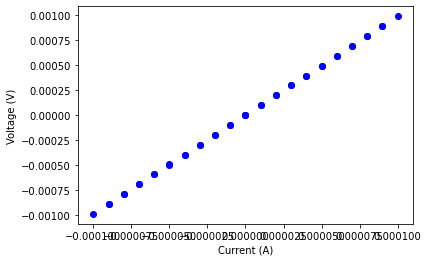

In [3]:
'''Take IV curve and plot.'''

folder = r'\data'
prefix = '10OhmResistor'

expt_path = os.getcwd() + folder
fname = get_next_filename(expt_path, prefix, suffix='.h5')
filename = os.path.join(expt_path, fname)

exp_para={
    'Imax':1e-4, # unit:amp
    'Imin':-1e-4,
    'step':1e-5,
    'v_channel':1,
    'v_range':'auto',
    'integrate_time':0.05,
    'settling_time':0.05 #This is the time for current source to reach setpoint.
}

dp = take_IV(filename,curs,nvm,exp_para)

plot(dp[0],dp[1],'bo') #plot the data
ylabel('Voltage (V)')
xlabel('Current (A)')
plt.show()

In [4]:
dp

In [ ]:
'''Take voltage using delta mode - Keithley use a three-points delta method.
Return of the measurement is voltage across the sample. Thermal voltage is
eliminated by the delta mode.'''